# Exploring gRNA features

I want to spend some time exploring the features I've engineered for the guide RNAs, both by themselves and in relation to each other.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy
from guide.dataset import GuideDataset
from itertools import combinations
from guide.datapoint import feature_units
from guide.plot_helpers import *

In [2]:
guide_dataset = GuideDataset('data/example_guide_data_with_bowtie_with_mfold.tsv')
points = guide_dataset.points
points = list(filter(lambda p: p.mfold_result().dG < 900, points)) # remove a small number of bad points

In [3]:
def compare_features(feature1, feature2, bins=100):
    plt.hist2d(feature_values(feature1, points), feature_values(feature2, points), bins=bins)
    plt.title('{} vs {}'.format(feature1, feature2))
    plt.xlabel(feature_label(feature1))
    plt.ylabel(feature_label(feature2))
    colorbar = plt.colorbar()
    colorbar.set_label('number of points')

def compare_feature_grid(features):
    for feature1, feature2 in combinations(features, 2):
        yield feature1, feature2
        compare_features(feature1, feature2)
        
def feature_histogram(feature, bins=100, xrng=None):
    plt.hist(feature_values(feature, points), bins=bins, range=xrng)
    plt.title(feature)
    plt.xlabel(feature_label(feature))
    plt.ylabel('number of points')

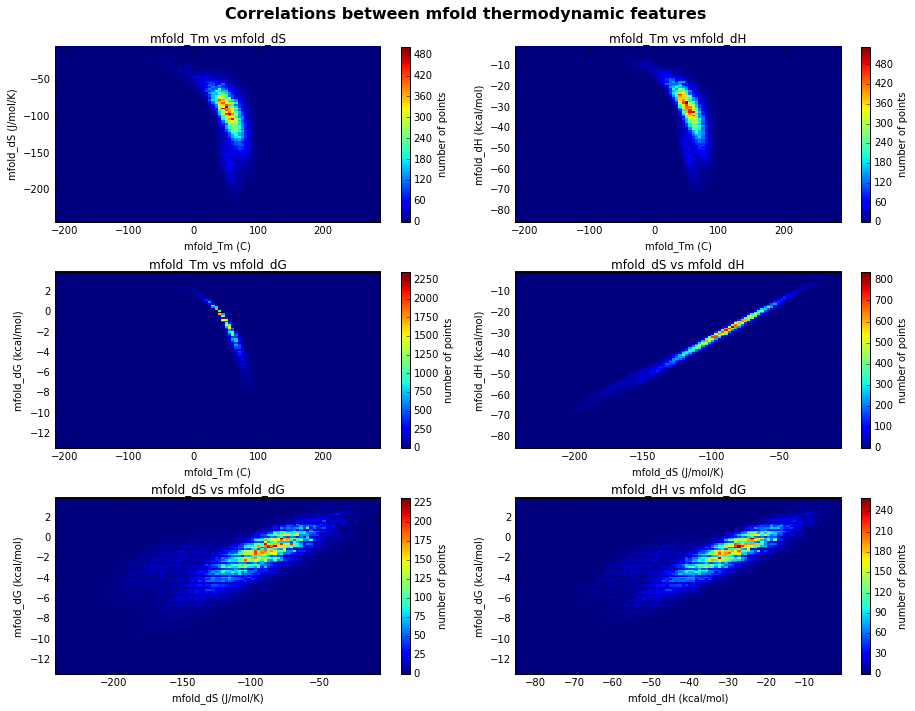

In [4]:
with figure_grid(3, 2, 'Correlations between mfold thermodynamic features') as fig:
    for i, features in enumerate(compare_feature_grid(['mfold_Tm', 'mfold_dS', 'mfold_dH', 'mfold_dG'])):
        fig.add_subplot(321 + i)

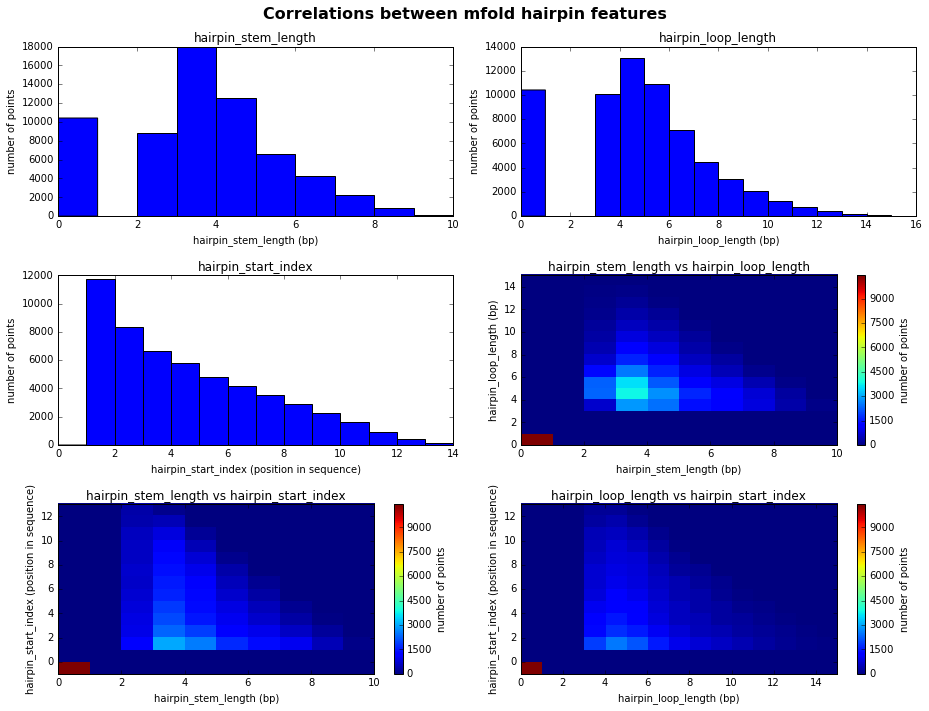

In [5]:
with figure_grid(3, 2, 'Correlations between mfold hairpin features') as fig:
    fig.add_subplot(321); feature_histogram('hairpin_stem_length', bins=10)
    fig.add_subplot(322); feature_histogram('hairpin_loop_length', bins=15)
    fig.add_subplot(323); feature_histogram('hairpin_start_index', xrng=(0, 14), bins=14)
    fig.add_subplot(324); compare_features('hairpin_stem_length', 'hairpin_loop_length', bins=(10, 15))
    fig.add_subplot(325); compare_features('hairpin_stem_length', 'hairpin_start_index', bins=(10, 14))
    fig.add_subplot(326); compare_features('hairpin_loop_length', 'hairpin_start_index', bins=(15, 14))

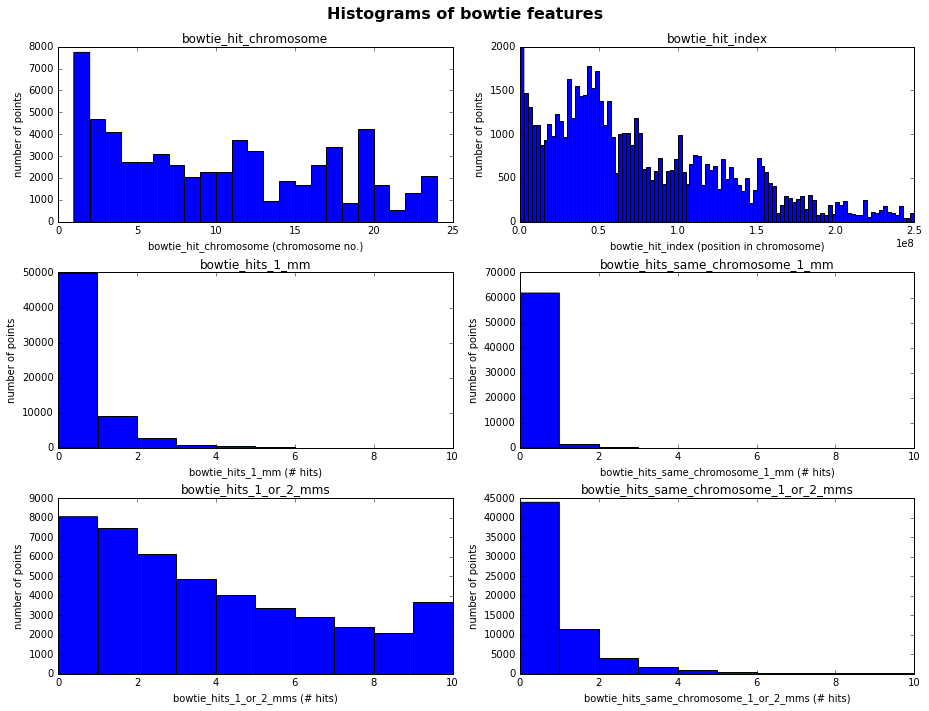

In [6]:
with figure_grid(3, 2, 'Histograms of bowtie features') as fig:
    fig.add_subplot(321); feature_histogram('bowtie_hit_chromosome', bins=23, xrng=(1,24))
    fig.add_subplot(322); feature_histogram('bowtie_hit_index', xrng=(0,2.5e8))
    fig.add_subplot(323); feature_histogram('bowtie_hits_1_mm', bins=10, xrng=(0,10))
    fig.add_subplot(324); feature_histogram('bowtie_hits_same_chromosome_1_mm', bins=10, xrng=(0,10))
    fig.add_subplot(325); feature_histogram('bowtie_hits_1_or_2_mms', bins=10, xrng=(0,10))
    fig.add_subplot(326); feature_histogram('bowtie_hits_same_chromosome_1_or_2_mms', bins=10, xrng=(0,10))